In [3]:
import random

In [5]:
with open("names.txt", "r", encoding="utf-8") as f:
    names = f.read().splitlines()

In [7]:
#lowercassing and shuffling
names = [name.strip().lower() for name in names if name.strip()]
random.shuffle(names)

#rewriting 
with open("names.txt", "w", encoding="utf-8") as f:
    for name in names:
        f.write(name + "\n")

In [9]:
words = open('names.txt','r').read().splitlines()

In [11]:
len(words)

7977

In [14]:
max(len(w) for w in words) 

19

In [16]:
#individual bigrams
#counting the combination of two words that are likely to follow

b = {}

# for w in words:
#     chs = ['<S>'] + list(w) + ['<E>']
#     for ch1,ch2 in zip(chs,chs[1:]):
#         bigram = (ch1,ch2)
#         b[bigram] = b.get(bigram,0) + 1 #Initializing to zero if the bigram didn't exist

In [18]:
#sorted(b.items(),key = lambda kv:-kv[1])

In [20]:
import torch

In [22]:
N = torch.zeros((31,31),dtype=torch.int32) #26 alphabets + other 2 junks+ <S> + <E> tokens

In [24]:
chars = sorted(list(set(''.join(words)))) #unique characters
stoi = {s:i+1 for i,s in enumerate(chars)} #encoding
stoi['_'] = 0
itos = {i:s for s,i in stoi.items()}



In [26]:
stoi

{'(': 1,
 ')': 2,
 '-': 3,
 '.': 4,
 'a': 5,
 'b': 6,
 'c': 7,
 'd': 8,
 'e': 9,
 'f': 10,
 'g': 11,
 'h': 12,
 'i': 13,
 'j': 14,
 'k': 15,
 'l': 16,
 'm': 17,
 'n': 18,
 'o': 19,
 'p': 20,
 'q': 21,
 'r': 22,
 's': 23,
 't': 24,
 'u': 25,
 'v': 26,
 'w': 27,
 'x': 28,
 'y': 29,
 'z': 30,
 '_': 0}

In [28]:
for w in words:
    chs = ['_'] + list(w) + ['_']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1,ix2] += 1

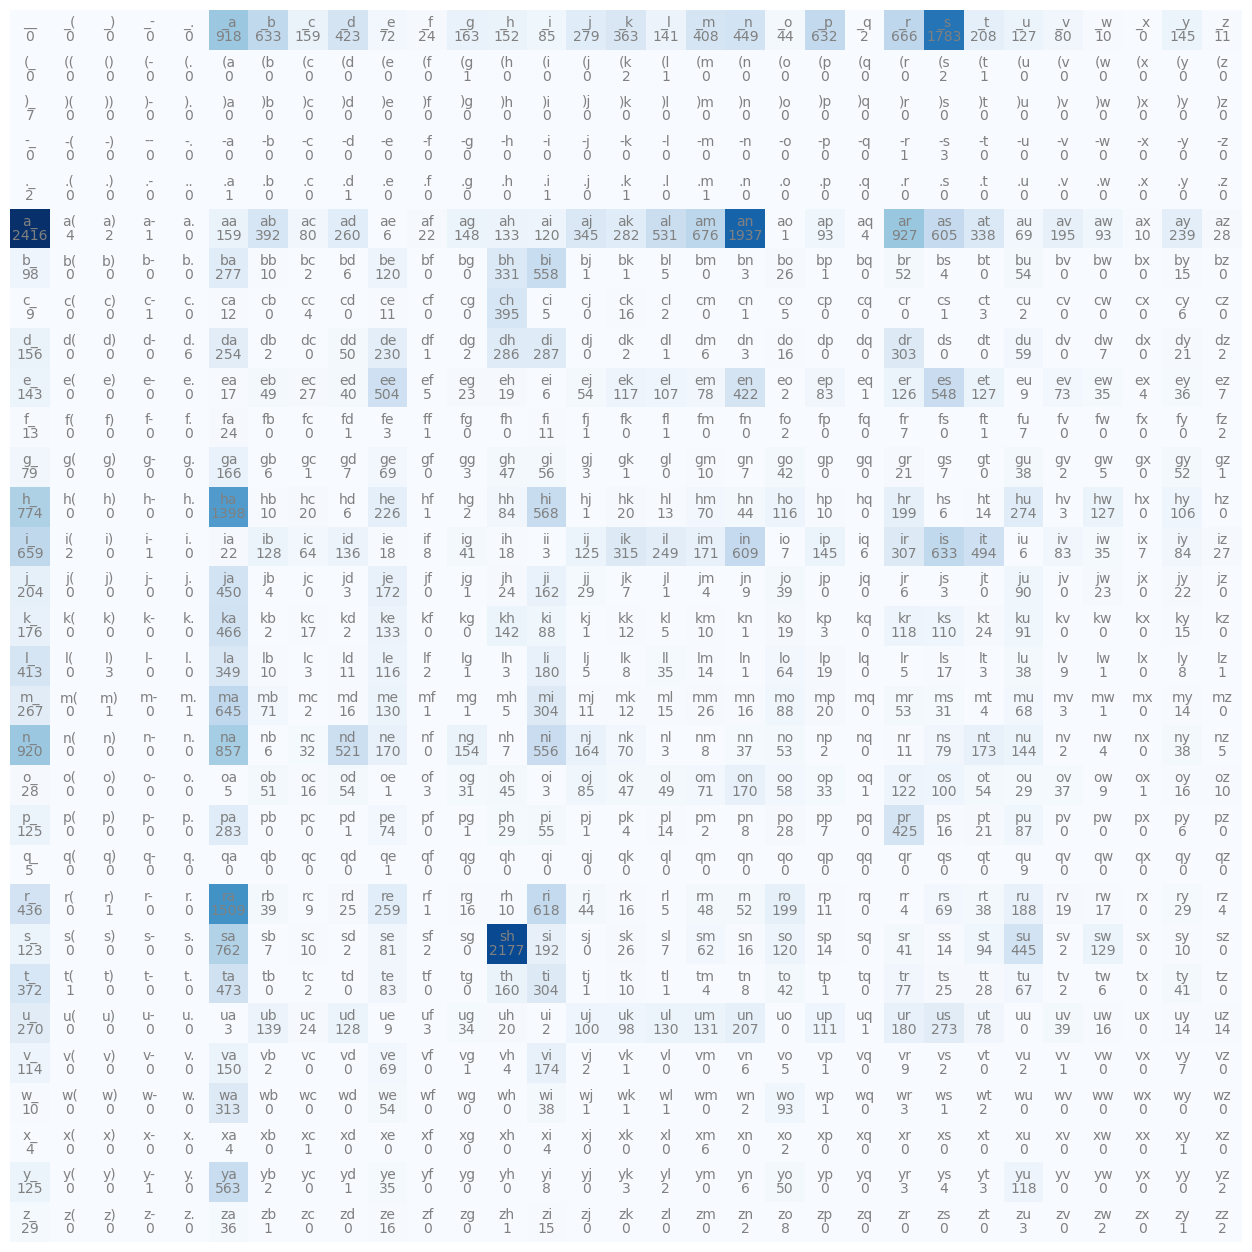

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.figure(figsize=(16,16))
plt.imshow(N,cmap='Blues')
for i in range(31):
    for j in range(31):
        chstr = itos[i] + itos[j]
        plt.text(j,i,chstr,ha='center',va='bottom',color='gray')
        plt.text(j,i,N[i,j].item(),ha='center',va='top',color='gray')
plt.axis('off');

In [30]:
p = N[0].float()
p /= p.sum()
p

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1151, 0.0794, 0.0199, 0.0530,
        0.0090, 0.0030, 0.0204, 0.0191, 0.0107, 0.0350, 0.0455, 0.0177, 0.0511,
        0.0563, 0.0055, 0.0792, 0.0003, 0.0835, 0.2235, 0.0261, 0.0159, 0.0100,
        0.0013, 0.0000, 0.0182, 0.0014])

In [32]:
#sampling

g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3,generator=g)
p = p/p.sum()


In [34]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
itos[ix]


'_'

In [37]:
torch.multinomial(p,num_samples=100,replacement=True,generator=g)


tensor([1, 1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1,
        0, 0, 1, 1])

In [39]:
P  = (N+1).float()
P /= P.sum(1,keepdim=True)


In [42]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix = 0
    while True:
        p = P[ix]
        
        
        ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

r_
sena_
pashyud_
l_
abin_
a_
ram_
seen_
pkhan_
sanavi_


In [44]:

#calculating the performance via average negative loglikelihood the close to 0 the better
log_likelihood = 0.0
n = 0

for w in words:
    chs = ['_'] + list(w) + ['_']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1,ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {logprob:.4f}')

nll = -log_likelihood

print(nll)
print(nll/n)

_g: -3.8883
gi: -2.4401
in: -1.9836
ne: -3.1641
ee: -1.6739
ez: -5.8190
z_: -1.5892
_s: -1.5016
su: -2.2815
uh: -4.5835
hr: -3.0260
ri: -1.7872
it: -2.1925
ta: -1.2999
a_: -1.4347
_a: -2.1649
ak: -3.5795
kh: -2.3274
ha: -1.0808
al: -2.9483
le: -2.4457
es: -1.5903
sh: -0.6957
h_: -1.6715
_m: -2.9745
mi: -1.7956
ik: -2.6413
ks: -2.5808
se: -3.9751
en: -1.8510
n_: -1.4803
_r: -2.4854
ra: -0.8954
as: -2.8181
sh: -0.6957
ha: -1.0808
am: -2.7073
mk: -4.9509
ku: -2.7685
um: -2.7452
ma: -1.0451
ar: -2.3919
r_: -2.1353
_e: -4.6977
ea: -5.0080
ak: -3.5795
k_: -2.1141
_k: -3.0910
kh: -2.3274
hu: -2.7076
us: -2.0149
sh: -0.6957
hb: -5.9264
bo: -4.0788
oo: -2.9786
o_: -3.6889
_k: -3.0910
ku: -2.7685
uk: -3.0329
ke: -2.3925
ee: -1.6739
e_: -2.9286
_p: -2.5377
pu: -2.6276
un: -2.2905
ny: -4.6422
ya: -0.5287
ad: -3.6604
di: -1.7900
ip: -3.4135
p_: -2.2687
_k: -3.0910
kh: -2.3274
ha: -1.0808
ar: -2.3919
re: -2.6546
el: -3.2163
l_: -1.1820
_n: -2.8789
na: -1.5511
an: -1.6555
nd: -2.0481
da: -1.9117
an: 

In [45]:
#iterating over the bigrams to create trainig set for neural net

xs,ys = [],[]
for w in words[:1]:
    chs = ['_'] + list(w) + ['_']
    for ch1,ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [46]:
import torch.nn.functional as F
xenc = F.one_hot(xs,num_classes=31).float()
xenc

xenc.shape

torch.Size([7, 31])

In [47]:
W = torch.randn((31,31))
logits = xenc @ W
counts = logits.exp()
probs = counts/counts.sum(1,keepdims=True)
probs

tensor([[0.0342, 0.0334, 0.0373, 0.0154, 0.0123, 0.0798, 0.0141, 0.0069, 0.0805,
         0.0378, 0.0525, 0.0121, 0.0165, 0.0293, 0.0540, 0.0237, 0.0095, 0.1264,
         0.0348, 0.0189, 0.0065, 0.0228, 0.0408, 0.0169, 0.0262, 0.0234, 0.0038,
         0.0143, 0.0405, 0.0247, 0.0505],
        [0.0144, 0.0106, 0.0279, 0.0306, 0.0094, 0.0113, 0.0098, 0.0209, 0.0338,
         0.0193, 0.0228, 0.0100, 0.0171, 0.0276, 0.0132, 0.1661, 0.0504, 0.0126,
         0.0671, 0.0211, 0.0453, 0.0892, 0.0134, 0.0880, 0.0150, 0.0107, 0.0539,
         0.0345, 0.0075, 0.0203, 0.0264],
        [0.0349, 0.0032, 0.0122, 0.0228, 0.0074, 0.0094, 0.0033, 0.0152, 0.0396,
         0.0261, 0.0100, 0.0204, 0.0623, 0.0025, 0.0243, 0.0105, 0.0036, 0.0074,
         0.0252, 0.0092, 0.0120, 0.0115, 0.0228, 0.0098, 0.5084, 0.0220, 0.0013,
         0.0060, 0.0026, 0.0389, 0.0153],
        [0.0256, 0.0238, 0.0212, 0.0117, 0.0152, 0.0104, 0.0093, 0.0047, 0.0078,
         0.0231, 0.0652, 0.0341, 0.0059, 0.0168, 0.0069, 0.1280,

In [52]:
probs[0].sum()

tensor(1.)

In [57]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((31,31),generator=g)


In [59]:
xenc = F.one_hot(xs,num_classes=31).float()
logits = xenc@W
counts = logits.exp()
probs = counts / counts.sum(1,keepdims=True)

In [61]:
probs.shape

torch.Size([7, 31])

In [85]:
#testing for one case of forward and backward passes
nlls = torch.zeros(8)
for i in range(8):
    x = xs[i].item()
    y = ys[i].item()
    print('*********')
    print(f'bigram eg {i+1}: {itos[x]}{itos[y]} (indexes {x},{y} )')
    print('input to network: ',x)
    print('output probability from neural net: ',probs[i])
    print('actual next chars',y)
    p = probs[i,y]
    print('probability assigned by network to the correct char: ',p.item())
    logp = torch.log(p)
    print('log likelihood ',logp.item())
    nll = -logp
    print('negative log likelihood:',nll.item())
    nlls[i] = nll

print('++++++++++')
print('average negaitve log likelihood ',nlls.mean().item())
    
    

*********
bigram eg 1: _g (indexes 0,11 )
input to network:  0
output probability from neural net:  tensor([0.0013, 0.0012, 0.0012, 0.0010, 0.0012, 0.1145, 0.0788, 0.0196, 0.0525,
        0.0088, 0.0031, 0.0201, 0.0187, 0.0104, 0.0345, 0.0450, 0.0173, 0.0507,
        0.0558, 0.0053, 0.0787, 0.0013, 0.0829, 0.2228, 0.0257, 0.0156, 0.0097,
        0.0018, 0.0010, 0.0178, 0.0018], grad_fn=<SelectBackward0>)
actual next chars 11
probability assigned by network to the correct char:  0.020071960985660553
log likelihood  -3.9084315299987793
negative log likelihood: 3.9084315299987793
*********
bigram eg 2: gi (indexes 11,13 )
input to network:  11
output probability from neural net:  tensor([0.1157, 0.0056, 0.0065, 0.0087, 0.0131, 0.2541, 0.0161, 0.0097, 0.0147,
        0.0979, 0.0083, 0.0131, 0.0641, 0.0774, 0.0128, 0.0072, 0.0077, 0.0136,
        0.0175, 0.0502, 0.0036, 0.0114, 0.0190, 0.0118, 0.0057, 0.0401, 0.0117,
        0.0070, 0.0108, 0.0574, 0.0073], grad_fn=<SelectBackward0>)
actual

In [86]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((31,31),generator=g,requires_grad=True)


In [96]:
#regularization



In [99]:
#actual gradient descent
#for 10 epochs

for k in range(100):
    #forward pass
    xenc = F.one_hot(xs,num_classes=31).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts/counts.sum(1,keepdims=True)
    #regularization loss
    loss = -probs[torch.arange(num),ys].log().mean() + 0.01*((W ** 2).mean())
    print(loss.item())

    #back pass
    W.grad = None
    loss.backward()

    #update
    #lr:0.1
    W.data += -50* W.grad

3.880817174911499
3.366772413253784
3.1173434257507324
2.961890459060669
2.8533692359924316
2.770580768585205
2.705324172973633
2.6538517475128174
2.6130435466766357
2.580327033996582
2.5537028312683105
2.5316405296325684
2.5130043029785156
2.4969823360443115
2.4830100536346436
2.4706881046295166
2.4597315788269043
2.449928045272827
2.4411141872406006
2.433159828186035
2.425956964492798
2.4194142818450928
2.413454294204712
2.4080092906951904
2.403020143508911
2.398435354232788
2.394211530685425
2.3903098106384277
2.3866961002349854
2.3833420276641846
2.3802220821380615
2.377312660217285
2.3745954036712646
2.3720526695251465
2.369668960571289
2.3674304485321045
2.3653252124786377
2.363342046737671
2.3614706993103027
2.359703540802002
2.3580312728881836
2.356447458267212
2.354945421218872
2.3535192012786865
2.352163076400757
2.3508729934692383
2.3496437072753906
2.3484714031219482
2.3473527431488037
2.346283435821533
2.3452610969543457
2.344282627105713
2.3433456420898438
2.3424465656280

In [100]:
#SAMPLE OUTPUT FROM NEURAL NET MODEL:

g = torch.Generator().manual_seed(2147483647)

for i in range(8):
    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]),num_classes=31).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1,keepdims=True)

        ix = torch.multinomial(p,num_samples=1,replacement=True,generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

r_
sh.k_
pashyud_
l_
abin_
a_
ram_
seen_


In [101]:
torch.cuda.is_available()

False

In [105]:
%pip show torch

Name: torchNote: you may need to restart the kernel to use updated packages.

Version: 2.5.1
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: D:\anaconda3\Lib\site-packages
Requires: filelock, fsspec, jinja2, networkx, setuptools, sympy, typing-extensions
Required-by: 
